# 1. Set Up Your Environment


In [1]:
!pip install numpy pandas tensorflow matplotlib


ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\srehansu barik\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "c:\users\srehansu barik\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "c:\users\srehansu barik\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\srehansu barik\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\srehansu barik\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\srehansu barik\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(versi

# 2. Load and Inspect the Data

In [37]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(train_df.columns)

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_3063', 'pixel_3064', 'pixel_3065', 'pixel_3066', 'pixel_3067',
       'pixel_3068', 'pixel_3069', 'pixel_3070', 'pixel_3071', 'label'],
      dtype='object', length=3073)


# 3. Preprocess the Data


In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

# Extract pixel columns and labels
X = np.array(train_df.iloc[:, :-1])  # All columns except the last one
y = np.array(train_df['label'])
# Reshape X to (num_samples, 32, 32, 3)
X = X.reshape(-1, 32, 32, 3)
# Normalize the images
X = X / 255.0
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')


X_train shape: (40000, 32, 32, 3)
X_val shape: (10000, 32, 32, 3)
y_train shape: (40000,)
y_val shape: (10000,)


# 4. Evaluate the Model


In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

# 5.Build the CNN Model

In [9]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
1250/1250 [==============================] - 66s 50ms/step - loss: 1.6713 - accuracy: 0.3933 - val_loss: 1.4491 - val_accuracy: 0.4866
Epoch 2/10
1250/1250 [==============================] - 61s 49ms/step - loss: 1.3605 - accuracy: 0.5130 - val_loss: 1.3029 - val_accuracy: 0.5351
Epoch 3/10
1250/1250 [==============================] - 59s 47ms/step - loss: 1.2363 - accuracy: 0.5628 - val_loss: 1.2081 - val_accuracy: 0.5743
Epoch 4/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.1468 - accuracy: 0.5935 - val_loss: 1.1756 - val_accuracy: 0.5816
Epoch 5/10
1250/1250 [==============================] - 37s 30ms/step - loss: 1.0807 - accuracy: 0.6180 - val_loss: 1.1969 - val_accuracy: 0.5775
Epoch 6/10
1250/1250 [==============================] - 38s 31ms/step - loss: 1.0217 - accuracy: 0.6393 - val_loss: 1.1320 - val_accuracy: 0.6088
Epoch 7/10
1250/1250 [==============================] - 36s 29ms/step - loss: 0.9717 - accuracy: 0.6561 - val_loss: 1.1230 -

# 6.Train the Model

In [34]:
X_test = np.array(test_df)  
X_test = X_test.reshape(-1, 32, 32, 3)
X_test = X_test / 255.0

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)  



313/313 [==============================] - 6s 20ms/step
[3 8 0 ... 5 1 7]


# 7. Visualize Results

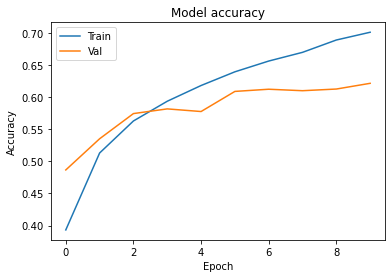

313/313 [==============================] - 6s 19ms/step


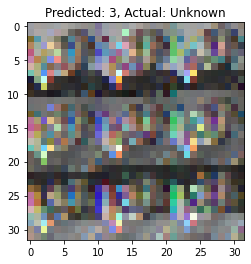

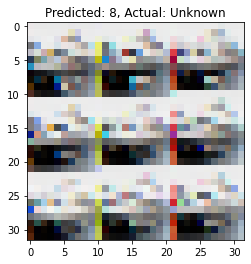

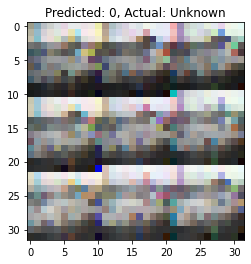

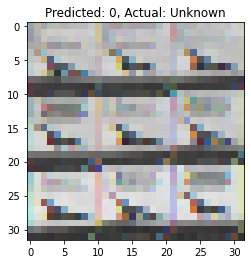

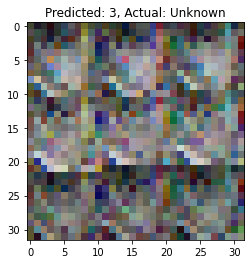

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i])
    actual_label = y_test[i] if 'y_test' in globals() else 'Unknown'
    plt.title(f'Predicted: {predicted_classes[i]}, Actual: {actual_label}')
    plt.show()

